# Merchants EDA

Goal: Analyze merchant-level attributes

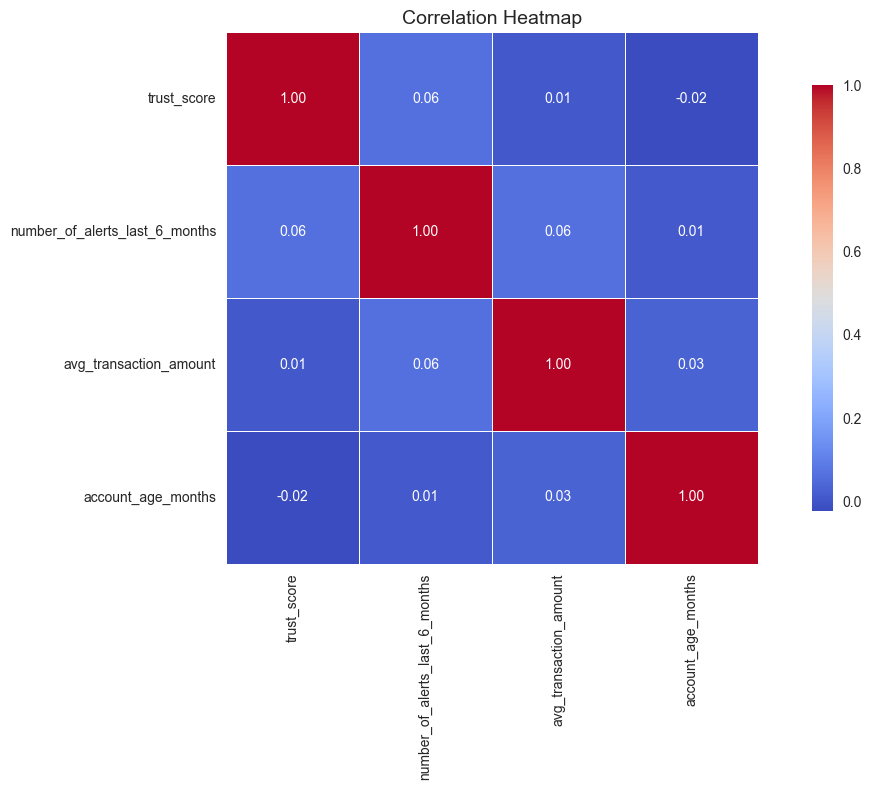

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr,
			ax=ax,
			annot=True,
			fmt='.2f',
			square=True,
			linewidths=.5,
			cbar_kws={"shrink": 0.8},
			cmap="coolwarm"
			)

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mastercard import dist_visualisation, dist_categorical_visualisation

In [17]:
# plt.rcParams("figure.figsize)

In [3]:
PROCESSED_DATA = Path("../data/processed/")
FIGURES_DATA = Path("../reports/figures/")

In [4]:
df = pd.read_parquet(PROCESSED_DATA / "merchants.parquet")

In [6]:
print('Initial shape:', df.shape)

Initial shape: (1000, 8)


In [7]:
df.columns

Index(['merchant_id', 'category', 'country', 'trust_score',
       'number_of_alerts_last_6_months', 'avg_transaction_amount',
       'account_age_months', 'has_fraud_history'],
      dtype='object')

In [8]:
df.head()

,merchant_id,category,country,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,M0001,travel,Austria,1.000000,3,97.23,84,0
1,M0002,clothing,Poland,0.689695,2,142.71,93,1
2,M0003,electronics,Czech Republic,0.834610,5,67.83,65,0
3,M0004,electronics,Belgium,0.607229,1,16.77,9,1
4,M0005,grocery,Ireland,0.641901,2,38.56,100,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   merchant_id                     1000 non-null   object 
 1   category                        1000 non-null   object 
 2   country                         1000 non-null   object 
 3   trust_score                     1000 non-null   float64
 4   number_of_alerts_last_6_months  1000 non-null   int64  
 5   avg_transaction_amount          1000 non-null   float64
 6   account_age_months              1000 non-null   int64  
 7   has_fraud_history               1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trust_score,1000.0,0.682568,0.194092,0.00,0.545615,0.697414,0.825599,1.00
number_of_alerts_last_6_months,1000.0,3.061000,1.722860,0.00,2.000000,3.000000,4.000000,9.00
avg_transaction_amount,1000.0,81.883090,79.187529,0.12,24.772500,58.205000,117.192500,709.04
account_age_months,1000.0,61.526000,33.453617,6.00,32.000000,61.000000,92.000000,119.00
has_fraud_history,1000.0,0.520000,0.499850,0.00,0.000000,1.000000,1.000000,1.00


## Numerical features

In [14]:
numerical_cols = ['trust_score', 'number_of_alerts_last_6_months', 'avg_transaction_amount', 'account_age_months']

In [18]:
df[numerical_cols].skew()

trust_score                      -0.336082
number_of_alerts_last_6_months    0.462118
avg_transaction_amount            1.896584
account_age_months                0.035148
dtype: float64

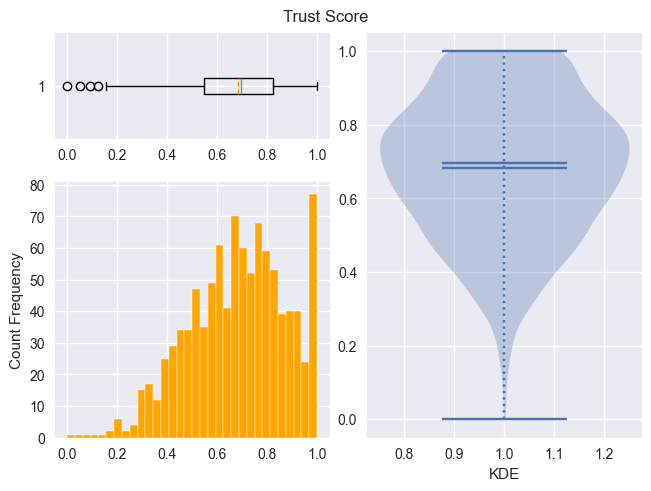

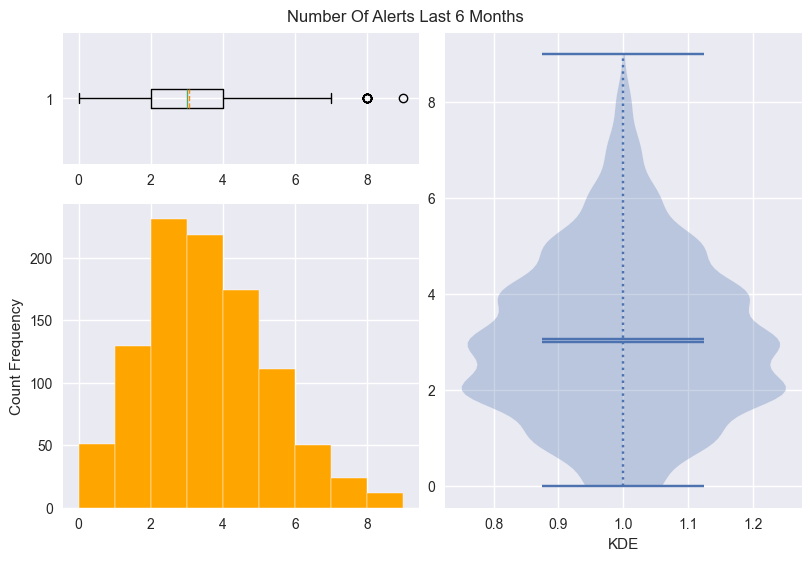

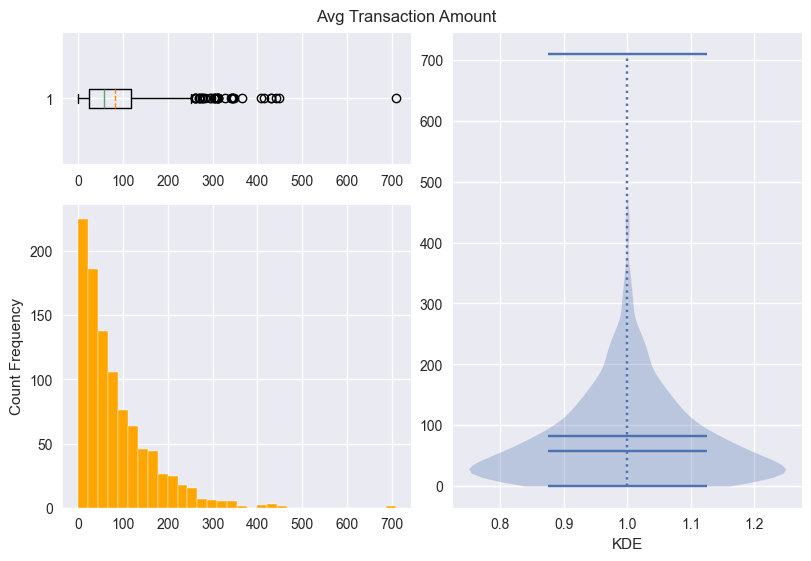

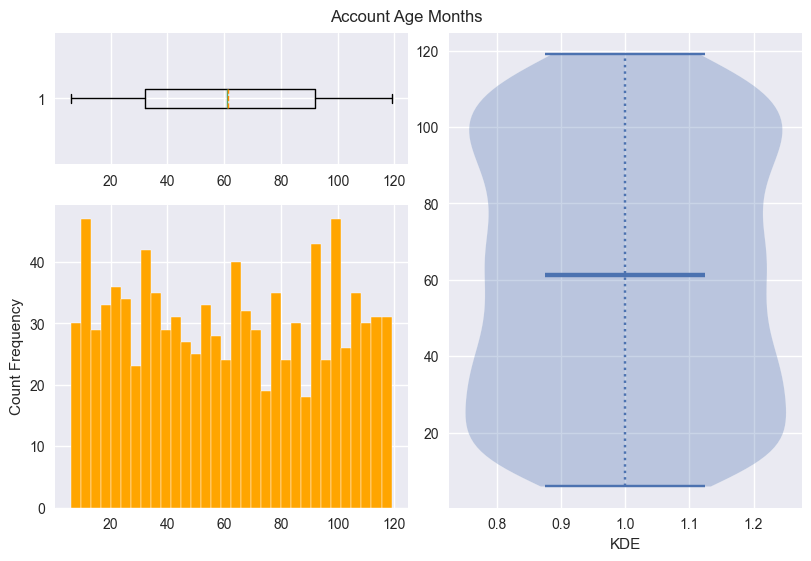

In [15]:
for col in numerical_cols:
	dist_visualisation(df[col], col.title().replace('_', ' '))

In [20]:
df["avg_transaction_amount_log"] = np.log1p(df["avg_transaction_amount"])

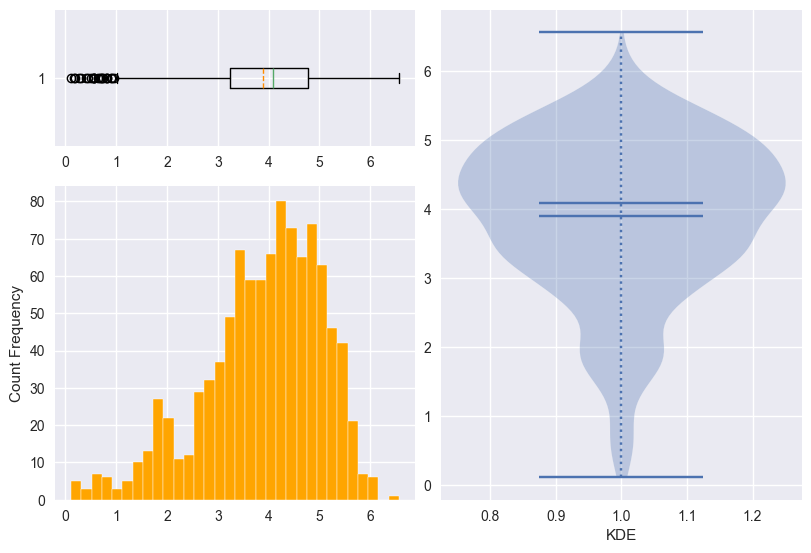

In [21]:
dist_visualisation(df["avg_transaction_amount_log"])

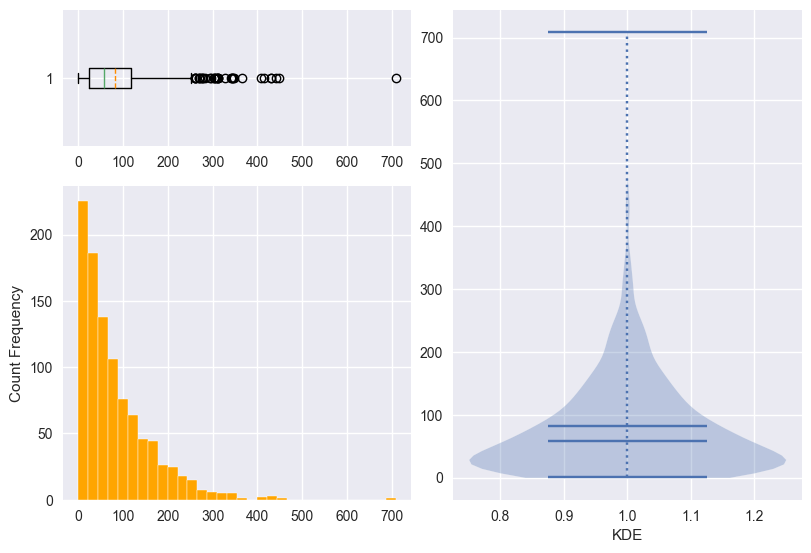

In [22]:
dist_visualisation(df["avg_transaction_amount"])

In [23]:
corr = df[numerical_cols].corr()

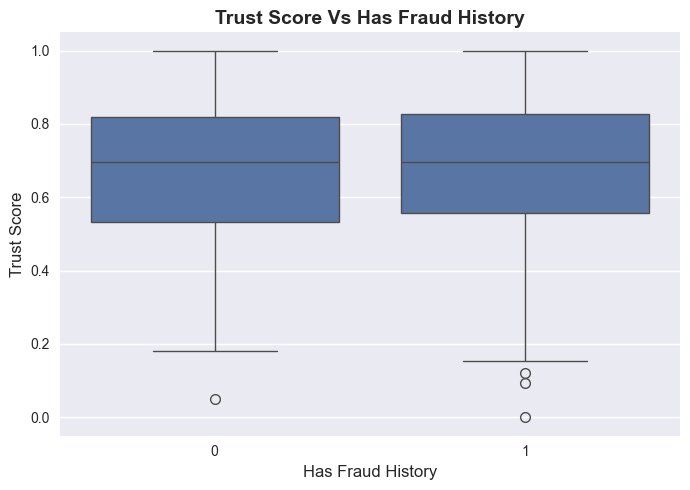

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(data=df, x="has_fraud_history", y="trust_score", ax=ax)

ax.set_title("Trust Score Vs Has Fraud History", fontsize=14, weight='bold')
ax.set_xlabel("Has Fraud History", fontsize=12)
ax.set_ylabel("Trust Score", fontsize=12)
ax.tick_params(axis="x")
ax.tick_params(axis="y")

fig.tight_layout()
plt.show()

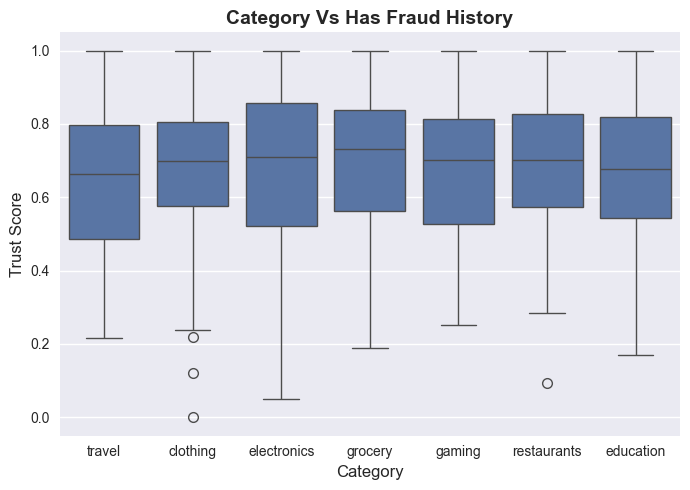

In [30]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(data=df, x="category", y="trust_score", ax=ax)

ax.set_title("Category Vs Has Fraud History", fontsize=14, weight='bold')
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Trust Score", fontsize=12)
ax.tick_params(axis="x")
ax.tick_params(axis="y")

fig.tight_layout()
plt.show()

### Categorical features


In [31]:
df['category'] = df['category'].astype('category')
df['country'] = df['country'].astype('category')
df['has_fraud_history'] = df['has_fraud_history'].astype('category')

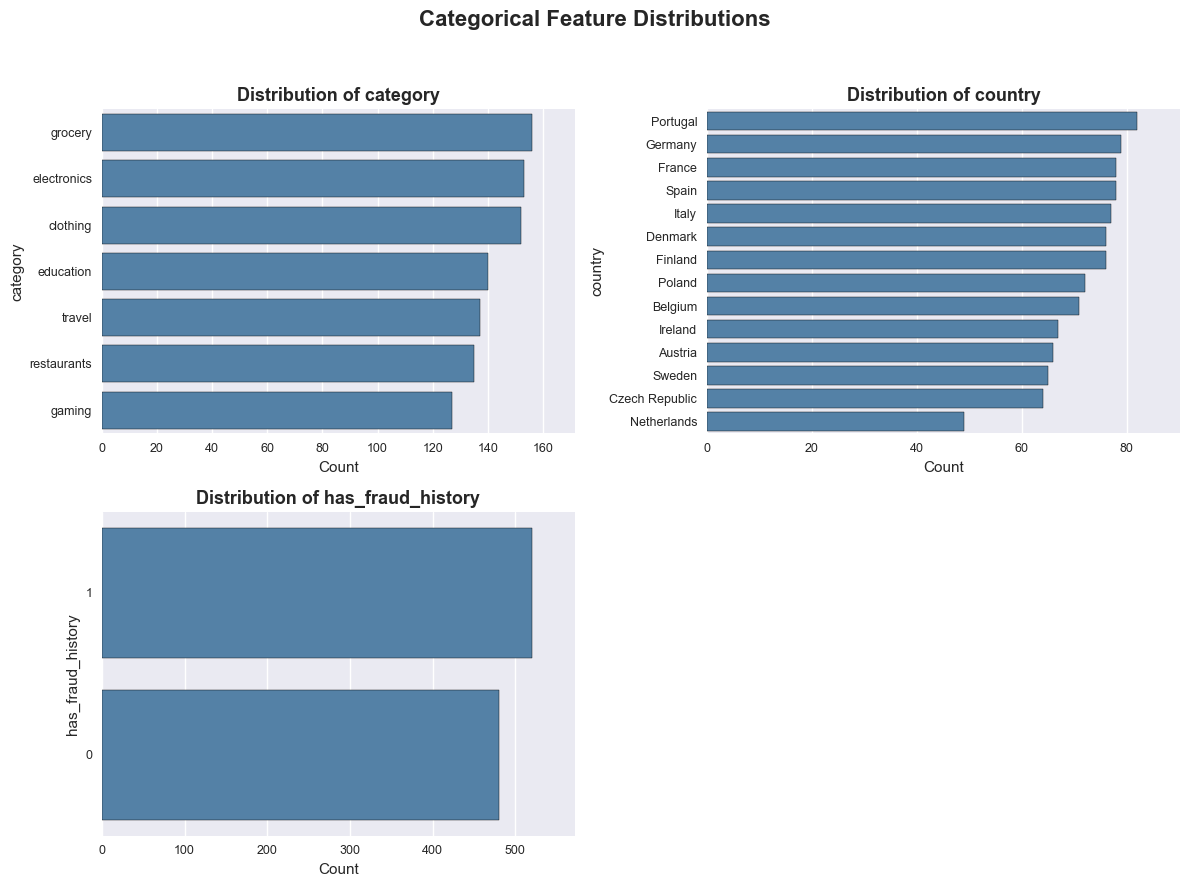

(<Figure size 1200x900 with 4 Axes>,
 array([<Axes: title={'center': 'Distribution of category'}, xlabel='Count', ylabel='category'>,
        <Axes: title={'center': 'Distribution of country'}, xlabel='Count', ylabel='country'>,
        <Axes: title={'center': 'Distribution of has_fraud_history'}, xlabel='Count', ylabel='has_fraud_history'>,
        <Axes: >], dtype=object))

In [33]:
categorical_cols = ['category', 'country','has_fraud_history']

dist_categorical_visualisation(df, categorical_cols)